### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [4]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

dados = {
    'Loja': ['Loja 1','Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
}
df_faturamento = pd.DataFrame(dados)
print(df_faturamento)


     Loja  Faturamento
0  Loja 1   1534509.12
1  Loja 2   1488459.06
2  Loja 3   1464025.03
3  Loja 4   1384497.58


# 2. Vendas por Categoria

In [8]:
import pandas as pd

#As quatro lojas já foram carregadas:
#loja = pd.read_csv(url)
#loja2 = pd.read_csv(url2)
#loja3 = pd.read_csv(url3)
#loja4 = pd.read_csv(url4)

vendas_loja1 = loja.groupby('Categoria do Produto').size().reset_index(name='Qtd_vendas')
vendas_loja2 = loja2.groupby('Categoria do Produto').size().reset_index(name='Qtd_vendas')
vendas_loja3 = loja3.groupby('Categoria do Produto').size().reset_index(name='Qtd_vendas')
vendas_loja4 = loja4.groupby('Categoria do Produto').size().reset_index(name='Qtd_vendas')

print('Loja 1')
print(vendas_loja1.sort_values(by='Qtd_vendas', ascending=False))
print('Loja 2')
print(vendas_loja2.sort_values(by='Qtd_vendas', ascending=False))
print('Loja 3')
print(vendas_loja3.sort_values(by='Qtd_vendas', ascending=False))
print('Loja 4')
print(vendas_loja4.sort_values(by='Qtd_vendas', ascending=False))



Loja 1
    Categoria do Produto  Qtd_vendas
6                 moveis         465
2            eletronicos         448
0             brinquedos         324
1       eletrodomesticos         312
3        esporte e lazer         284
4  instrumentos musicais         182
5                 livros         173
7  utilidades domesticas         171
Loja 2
    Categoria do Produto  Qtd_vendas
6                 moveis         442
2            eletronicos         422
0             brinquedos         313
1       eletrodomesticos         305
3        esporte e lazer         275
4  instrumentos musicais         224
5                 livros         197
7  utilidades domesticas         181
Loja 3
    Categoria do Produto  Qtd_vendas
6                 moveis         499
2            eletronicos         451
0             brinquedos         315
1       eletrodomesticos         278
3        esporte e lazer         277
5                 livros         185
4  instrumentos musicais         177
7  utilidades dom

# 3. Média de Avaliação das Lojas


In [9]:
media_loja1 = loja['Avaliação da compra'].mean()
media_loja2 = loja2['Avaliação da compra'].mean()
media_loja3 = loja3['Avaliação da compra'].mean()
media_loja4 = loja4['Avaliação da compra'].mean()

In [10]:
print(f"Média das avaliações Loja 1: {media_loja1:.2f}")
print(f"Média das avaliações Loja 2: {media_loja2:.2f}")
print(f"Média das avaliações Loja 3: {media_loja3:.2f}")
print(f"Média das avaliações Loja 4: {media_loja4:.2f}")


Média das avaliações Loja 1: 3.98
Média das avaliações Loja 2: 4.04
Média das avaliações Loja 3: 4.05
Média das avaliações Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [12]:
vendas_produtos_loja1 = loja['Produto'].value_counts().reset_index()
vendas_produtos_loja1.columns = ['Produto', 'Qtd_vendas']
produto_mais_vendido_1 = vendas_produtos_loja1.iloc[0]
produto_menos_vendido_1 = vendas_produtos_loja1.iloc[-1]

vendas_produtos_loja2 = loja2['Produto'].value_counts().reset_index()
vendas_produtos_loja2.columns = ['Produto', 'Qtd_vendas']
produto_mais_vendido_2 = vendas_produtos_loja2.iloc[0]
produto_menos_vendido_2 = vendas_produtos_loja2.iloc[-1]

vendas_produtos_loja3 = loja3['Produto'].value_counts().reset_index()
vendas_produtos_loja3.columns = ['Produto', 'Qtd_vendas']
produto_mais_vendido_3 = vendas_produtos_loja3.iloc[0]
produto_menos_vendido_3 = vendas_produtos_loja3.iloc[-1]

vendas_produtos_loja4 = loja4['Produto'].value_counts().reset_index()
vendas_produtos_loja4.columns = ['Produto', 'Qtd_vendas']
produto_mais_vendido_4 = vendas_produtos_loja4.iloc[0]
produto_menos_vendido_4 = vendas_produtos_loja4.iloc[-1]

In [15]:
resultados = {
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Mais vendido": [
        f"{produto_mais_vendido_1['Produto']}({produto_mais_vendido_1['Qtd_vendas']}vendas)",
        f"{produto_mais_vendido_2['Produto']}({produto_mais_vendido_2['Qtd_vendas']}vendas)",
        f"{produto_mais_vendido_3['Produto']}({produto_mais_vendido_3['Qtd_vendas']}vendas)",
        f"{produto_mais_vendido_4['Produto']}({produto_mais_vendido_4['Qtd_vendas']}vendas)"
    ],
    "Menos vendido": [
        f"{produto_menos_vendido_1['Produto']}({produto_menos_vendido_1['Qtd_vendas']}vendas)",
        f"{produto_menos_vendido_2['Produto']}({produto_menos_vendido_2['Qtd_vendas']}vendas)",
        f"{produto_menos_vendido_3['Produto']}({produto_menos_vendido_3['Qtd_vendas']}vendas)",
        f"{produto_menos_vendido_4['Produto']}({produto_menos_vendido_4['Qtd_vendas']}vendas)"
    ]
}

import pandas as pd
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

     Loja                        Mais vendido                Menos vendido
0  Loja 1               Micro-ondas(60vendas)       Celular ABXY(33vendas)
1  Loja 2  Iniciando em programação(65vendas)  Jogo de tabuleiro(32vendas)
2  Loja 3             Kit banquetas(57vendas)   Blocos de montar(35vendas)
3  Loja 4                  Cama box(62vendas)           Guitarra(33vendas)


# 5. Frete Médio por Loja

In [16]:
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

In [17]:
print(f'Custo médio de frete Loja 1: R$ {frete_medio_loja1:.2f}')
print(f'Custo médio de frete Loja 2: R$ {frete_medio_loja2:.2f}')
print(f'Custo médio de frete Loja 3: R$ {frete_medio_loja3:.2f}')
print(f'Custo médio de frete Loja 4: R$ {frete_medio_loja4:.2f}')

Custo médio de frete Loja 1: R$ 34.69
Custo médio de frete Loja 2: R$ 33.62
Custo médio de frete Loja 3: R$ 33.07
Custo médio de frete Loja 4: R$ 31.28


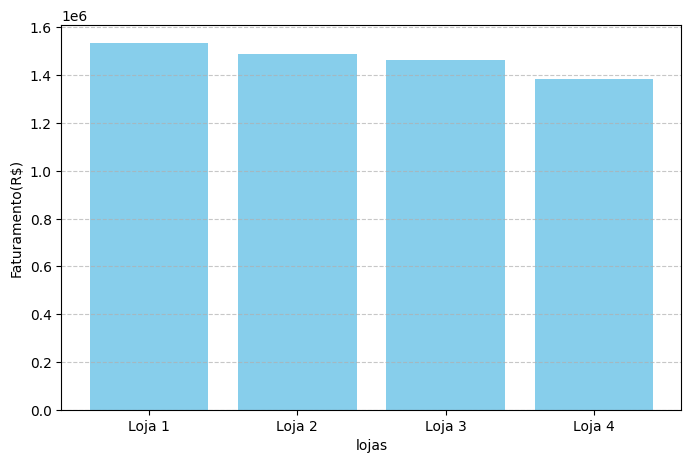

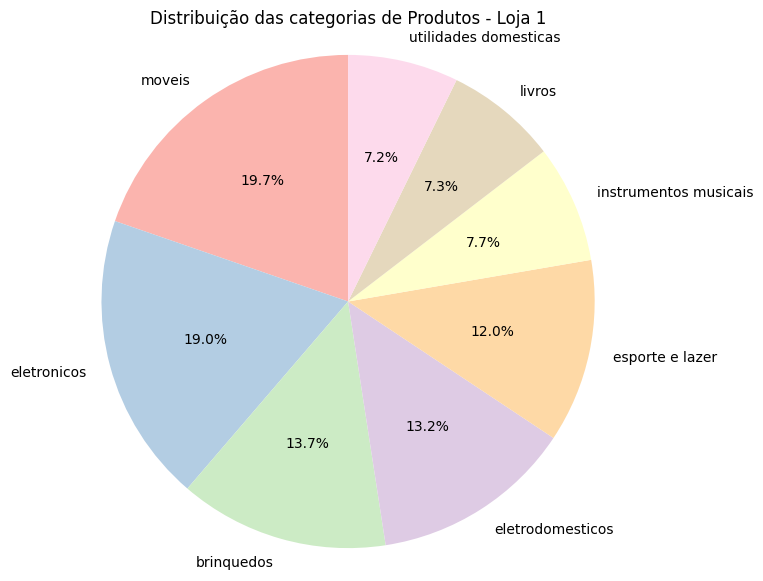

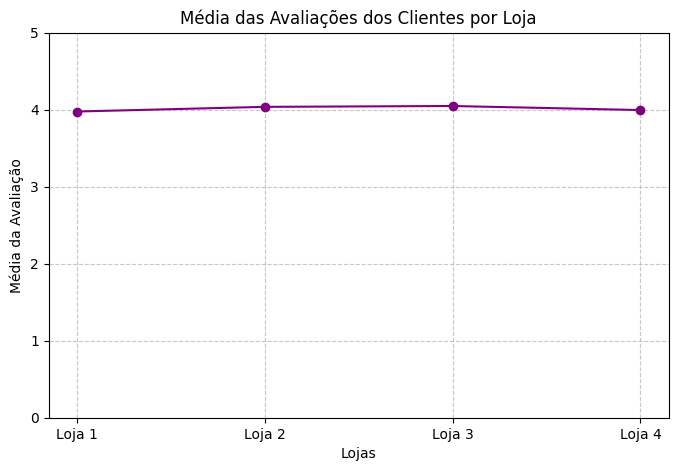

In [19]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

#GRáfico de barras - Faturamento total por loja
faturamento = [loja['Preço'].sum(), loja2['Preço'].sum(), loja3['Preço'].sum(), loja4['Preço'].sum()]

plt.figure(figsize=(8,5))
plt.bar(lojas, faturamento, color='skyblue')
plt.xlabel('lojas')
plt.ylabel('Faturamento(R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Gráfico de pizza - Distribuição das categorias em loja 1
categorias_loja1 = loja['Categoria do Produto'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(categorias_loja1, labels=categorias_loja1.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Distribuição das categorias de Produtos - Loja 1')
plt.axis('equal')
plt.show()

#Gráfico de linha - Média das avaliações dos clientes por loja
avaliacoes = [loja['Avaliação da compra'].mean(), loja2['Avaliação da compra'].mean(), loja3['Avaliação da compra'].mean(), loja4['Avaliação da compra'].mean()]

plt.figure(figsize=(8,5))
plt.plot(lojas, avaliacoes, marker='o', linestyle='-', color='purple')
plt.title('Média das Avaliações dos Clientes por Loja')
plt.xlabel('Lojas')
plt.ylabel('Média da Avaliação')
plt.ylim(0,5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Senhor João,

O objetivo deste relatório é apresentar uma análise detalhada do desempenho de suas quatro lojas, com foco em diferentes aspectos do negócio, visando apoiá-lo na decisão de qual loja seria mais vantajoso vender. Foram consideradas as seguintes métricas principais: faturamento total, categorias de produtos mais e menos vendidas, média das avaliações dos clientes, produtos mais e menos vendidos, e o custo médio do frete pago pelos clientes em cada loja.

O faturamento é um indicador fundamental para avaliar a saúde financeira das lojas. Entre as suas lojas, o faturamento total apresentou variações, e destacamos aquela que apresentou o menor volume financeiro, que foi a loja 4, como podemos visualizar no gráfico a seguir:

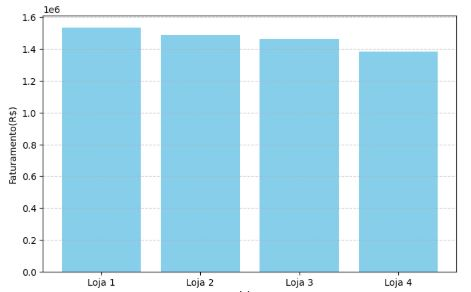

Na categoria de Produtos Mais e Menos Vendidas, analisamos a distribuição das vendas por categorias de produtos em cada loja. Isso revela quais tipos de produtos têm maior demanda localmente e quais categorias apresentam menor desempenho. Uma loja equilibrada comercialmente tem diversidade nas vendas, com categorias fortes que atraem clientes.Podemos perceber no gráfico abaixo que categorias como móveis e eletrônicos possuem  maior volume de vendas e maior valor agregado:

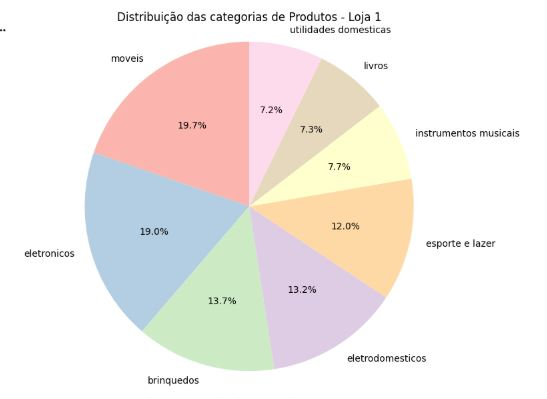

A satisfação dos clientes é um pilar importante para sustentabilidade do negócio. A análise das médias das avaliações de compra mostrou variações na percepção dos clientes entre as lojas, indicando pontos fortes e áreas de melhoria em atendimento e qualidade dos produtos. A média das quatro lojas foi bastante expressiva, evidenciando a qualidade do atendimento das lojas do Senhor João, porém uma das lojas ficou abaixo do esperado. Como fica evidenciado no gráfico abaixo:


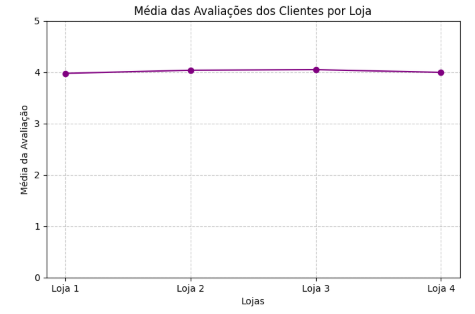

Custo Médio do Frete
O custo do frete influencia diretamente a decisão do cliente e a margem de lucro. Avaliar o valor médio pago pelos clientes por frete revela a atratividade das lojas em termos logísticos e políticas de distribuição. Atualmente a loja com maior frete embutido é a loja 1 e a loja com o frete mais baixo é a loja 4.

Com base nas análises e visualizações realizadas, a recomendação é considerar a venda da loja que apesar de apresentar bom faturamento, apresenta performance inferior nos principais aspectos avaliados, como satisfação do cliente e diversidade de categorias vendidas, assim como custo médio de frete elevado, que pode impactar negativamente as vendas futuras, que é a loja de número 1.

Assim, ao priorizar as lojas com melhores desempenho multi-dimensional, o senhor maximiza o potencial de lucro, satisfação do cliente e sustentabilidade do negócio a longo prazo.

Fico à disposição para apresentar gráficos mais elaborados e discutir quaisquer dúvidas que houver.

Atenciosamente,
Izabela Santos de Souza
Analista de Dados